<a href="https://colab.research.google.com/github/ashika67/Smart-Agriculture/blob/main/agri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile, os

In [4]:
zip_path = "archive.zip"   # Path to uploaded dataset
extract_path = "/mnt/data/agriculture_dataset"

# Extract zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find CSV file inside zip
files = os.listdir(extract_path)
print("Extracted files:", files)

# Load the dataset (assuming first CSV file is the data)
csv_file = [f for f in files if f.endswith('.csv')][0]
data = pd.read_csv(os.path.join(extract_path, csv_file))

print("\n✅ Dataset Loaded Successfully")
print("Shape:", data.shape)
print("\nColumns:", list(data.columns))
print("\nFirst 5 Rows:")
print(data.head())


Extracted files: ['Crop_recommendation.csv']

✅ Dataset Loaded Successfully
Shape: (2200, 8)

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

First 5 Rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


/tmp/ipython-input-2018690076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['label'], order=data['label'].value_counts().index, palette="viridis")


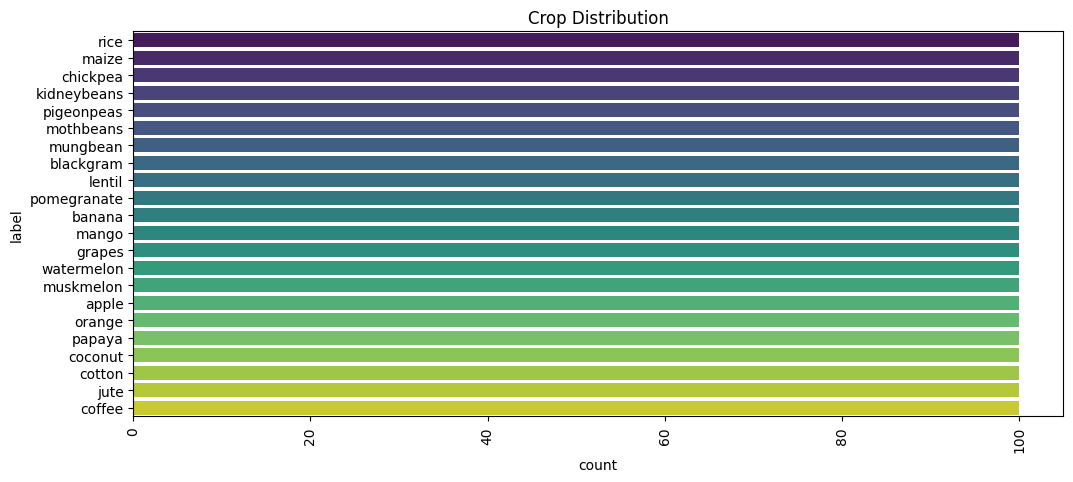

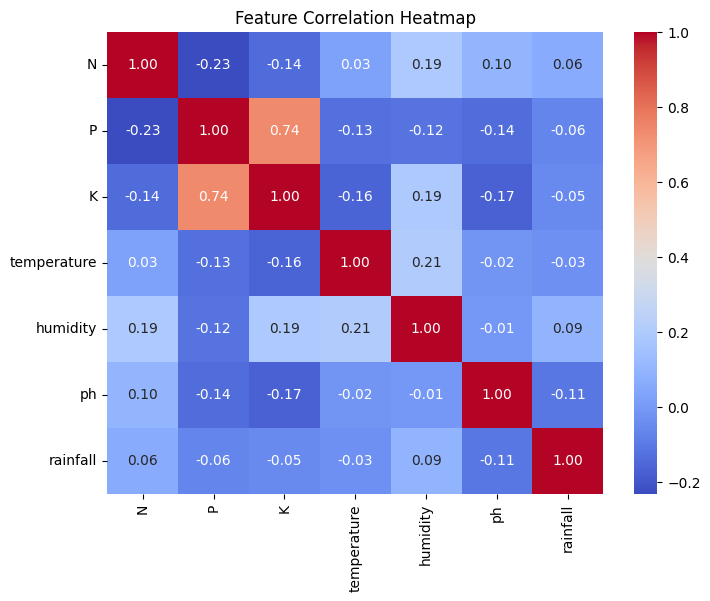

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(data['label'], order=data['label'].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()

# Correlation Heatmap (numerical features only)
plt.figure(figsize=(8,6))
numeric_data = data.select_dtypes(include=['int64', 'float64'])   # only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()